In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import RobustScaler
import pickle


In [3]:
data=pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.shape

(2200, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [20]:
print("Missing values in the dataset: ",data.isnull().sum())

Missing values in the dataset:  N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [22]:
data=data.dropna()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

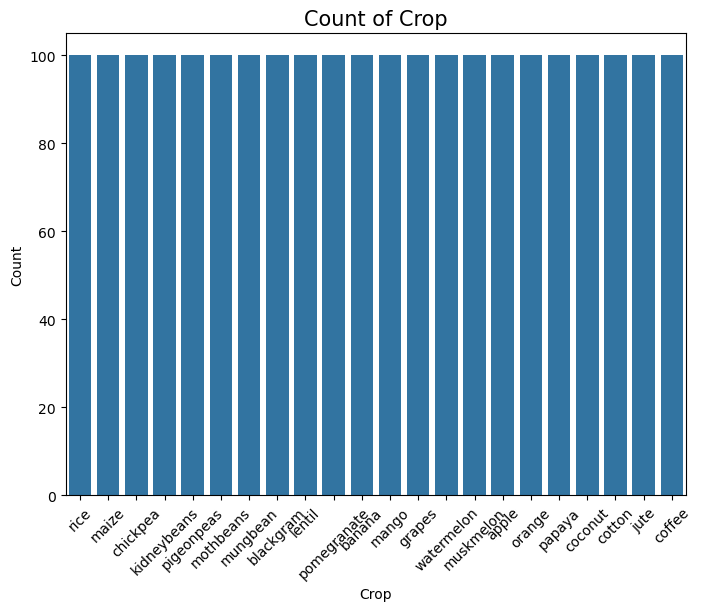

In [24]:
fig,ax=plt.subplots(1,1, figsize=(8,6))
sns.countplot(data=data,x='label')
ax.set(xlabel='Crop')
ax.set(ylabel='Count')
plt.xticks(rotation=45)
plt.title('Count of Crop', fontsize=15,c='black')
plt.show()

In [26]:
correlation_matrix=data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
print("Correlation matrix", correlation_matrix)

Correlation matrix                     N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


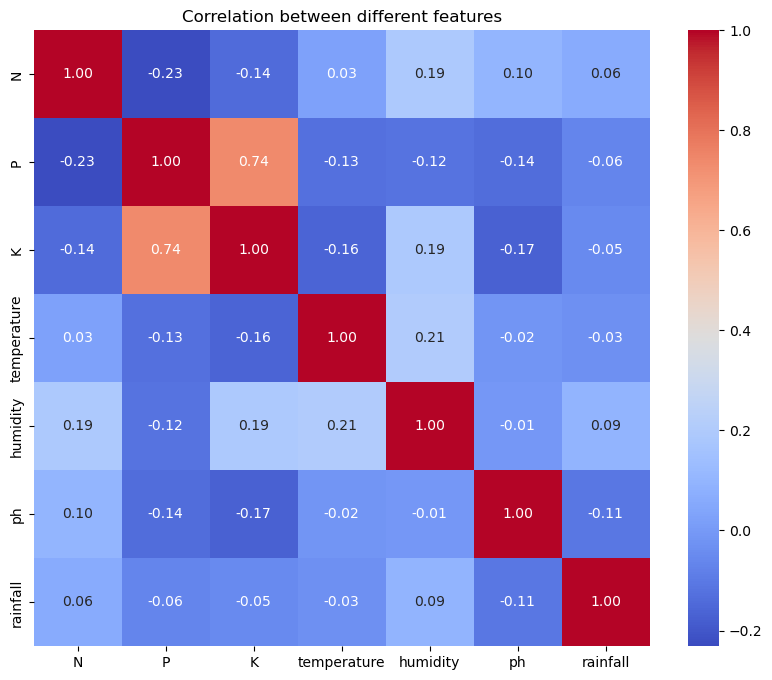

In [28]:
#plotting the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True,fmt='.2f')
plt.title("Correlation between different features")
plt.show()

In [30]:
# Separate features and target variable
X = data.drop('label', axis=1)
y = data['label']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
# Scale the features using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [36]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [52]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nPrecision:\n", precision_score(y_test, y_pred, average='micro'))
print("\nRecall:\n", recall_score(y_test, y_pred, average='micro'))
print("\nF1 Score:\n", f1_score(y_test, y_pred, average='micro'))


Accuracy: 0.9890909090909091

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.84      1.00      0.92        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00    

In [69]:
# Pickle the model for future use
with open('crop_recommendation_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Load the pickled model
with open('crop_recommendation_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [81]:
new_data = [[10, 150, 140, 35, 80, 6.5, 100]]
new_data_df = pd.DataFrame(new_data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# Scale the new data
new_data_scaled = scaler.transform(new_data_df)

# Make predictions
predicted_crop = loaded_model.predict(new_data_scaled)
print("Recommended Crop:", predicted_crop[0])

Recommended Crop: grapes


In [85]:
# Pickle the scaler for future use
with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)